In [30]:
library( "DESeq2" )
library('tximport')
library('stringr')

In [6]:
out_file_path <- './'
data_dir <- paste(out_file_path,'data/th_data/', sep = '')
compass_data_dir <- paste(data_dir,'GSE162300_DFMO_RNA_est_counts.csv', sep = '')

**read in bulk RNA data**

In [16]:
compass_data_raw <- read.csv(compass_data_dir, sep = ',', row.names = 1) # estimated counts
head(compass_data_raw)

,Th17p_Vehicle_WT1_run1,Th17p_Vehicle_WT1_run2,Th17n_Vehicle_WT1_run1,Th17n_Vehicle_WT1_run2,iTreg_Vehicle_WT1_run1,iTreg_Vehicle_WT1_run2,Th17p_DFMO_WT1_run1,Th17p_DFMO_WT1_run2,Th17n_DFMO_WT1_run1,Th17n_DFMO_WT1_run2,⋯,Th17n_Vehicle_WT3_run1,Th17n_Vehicle_WT3_run2,iTreg_Vehicle_WT3_run1,iTreg_Vehicle_WT3_run2,Th17p_DFMO_WT3_run1,Th17p_DFMO_WT3_run2,Th17n_DFMO_WT3_run1,Th17n_DFMO_WT3_run2,iTreg_DFMO_WT3_run1,iTreg_DFMO_WT3_run2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0610007P14RIK,787,870,708,845,570.0,624,786,846,864,978,⋯,1183,1332,794,853.00,928,1045.00,1120,1163.00,710.00,723
0610009B22RIK,93,98,66,70,87.9,100,123,128,106,104,⋯,94,76,109,145.00,121,131.00,131,137.78,137.00,148
0610009L18RIK,2,2,2,1,3.0,4,4,5,3,2,⋯,6,3,0,0.00,5,11.00,3,4.00,4.00,5
0610009O20RIK,177,206,148,170,194.0,159,168,172,161,158,⋯,249,284,202,254.98,216,228.98,212,226.00,258.97,246
0610010F05RIK,24,23,23,25,41.0,43,32,22,32,31,⋯,46,39,30,40.00,44,55.00,24,31.00,20.00,14
0610010K14RIK,182,254,211,256,193.0,239,231,254,264,313,⋯,243,288,297,310.00,317,294.00,283,332.00,416.00,453


for now, round ints

In [20]:
n_floats = compass_data_raw[compass_data_raw != floor(compass_data_raw)]
length(n_floats)

[1] 91200

In [22]:
# for now, round ints
compass_data <- round(compass_data_raw)

In [23]:
head(compass_data)

,Th17p_Vehicle_WT1_run1,Th17p_Vehicle_WT1_run2,Th17n_Vehicle_WT1_run1,Th17n_Vehicle_WT1_run2,iTreg_Vehicle_WT1_run1,iTreg_Vehicle_WT1_run2,Th17p_DFMO_WT1_run1,Th17p_DFMO_WT1_run2,Th17n_DFMO_WT1_run1,Th17n_DFMO_WT1_run2,⋯,Th17n_Vehicle_WT3_run1,Th17n_Vehicle_WT3_run2,iTreg_Vehicle_WT3_run1,iTreg_Vehicle_WT3_run2,Th17p_DFMO_WT3_run1,Th17p_DFMO_WT3_run2,Th17n_DFMO_WT3_run1,Th17n_DFMO_WT3_run2,iTreg_DFMO_WT3_run1,iTreg_DFMO_WT3_run2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0610007P14RIK,787,870,708,845,570,624,786,846,864,978,⋯,1183,1332,794,853,928,1045,1120,1163,710,723
0610009B22RIK,93,98,66,70,88,100,123,128,106,104,⋯,94,76,109,145,121,131,131,138,137,148
0610009L18RIK,2,2,2,1,3,4,4,5,3,2,⋯,6,3,0,0,5,11,3,4,4,5
0610009O20RIK,177,206,148,170,194,159,168,172,161,158,⋯,249,284,202,255,216,229,212,226,259,246
0610010F05RIK,24,23,23,25,41,43,32,22,32,31,⋯,46,39,30,40,44,55,24,31,20,14
0610010K14RIK,182,254,211,256,193,239,231,254,264,313,⋯,243,288,297,310,317,294,283,332,416,453


In [33]:
meta_data$sample

[1] "Th17p_Vehicle_WT1" "Th17p_Vehicle_WT1" "Th17n_Vehicle_WT1"
 [4] "Th17n_Vehicle_WT1" "iTreg_Vehicle_WT1" "iTreg_Vehicle_WT1"
 [7] "Th17p_DFMO_WT1"    "Th17p_DFMO_WT1"    "Th17n_DFMO_WT1"   
[10] "Th17n_DFMO_WT1"    "iTreg_DFMO_WT1"    "iTreg_DFMO_WT1"   
[13] "Th17p_Vehicle_WT2" "Th17p_Vehicle_WT2" "Th17n_Vehicle_WT2"
[16] "Th17n_Vehicle_WT2" "iTreg_Vehicle_WT2" "iTreg_Vehicle_WT2"
[19] "Th17p_DFMO_WT2"    "Th17p_DFMO_WT2"    "Th17n_DFMO_WT2"   
[22] "Th17n_DFMO_WT2"    "iTreg_DFMO_WT2"    "iTreg_DFMO_WT2"   
[25] "Th17p_Vehicle_WT3" "Th17p_Vehicle_WT3" "Th17n_Vehicle_WT3"
[28] "Th17n_Vehicle_WT3" "iTreg_Vehicle_WT3" "iTreg_Vehicle_WT3"
[31] "Th17p_DFMO_WT3"    "Th17p_DFMO_WT3"    "Th17n_DFMO_WT3"   
[34] "Th17n_DFMO_WT3"    "iTreg_DFMO_WT3"    "iTreg_DFMO_WT3"

[1] "Th17p_Vehicle" "Th17p_Vehicle" "Th17n_Vehicle" "Th17n_Vehicle"
 [5] "iTreg_Vehicle" "iTreg_Vehicle" "Th17p_DFMO"    "Th17p_DFMO"   
 [9] "Th17n_DFMO"    "Th17n_DFMO"    "iTreg_DFMO"    "iTreg_DFMO"   
[13] "Th17p_Vehicle" "Th17p_Vehicle" "Th17n_Vehicle" "Th17n_Vehicle"
[17] "iTreg_Vehicle" "iTreg_Vehicle" "Th17p_DFMO"    "Th17p_DFMO"   
[21] "Th17n_DFMO"    "Th17n_DFMO"    "iTreg_DFMO"    "iTreg_DFMO"   
[25] "Th17p_Vehicle" "Th17p_Vehicle" "Th17n_Vehicle" "Th17n_Vehicle"
[29] "iTreg_Vehicle" "iTreg_Vehicle" "Th17p_DFMO"    "Th17p_DFMO"   
[33] "Th17n_DFMO"    "Th17n_DFMO"    "iTreg_DFMO"    "iTreg_DFMO"

In [41]:
meta_data <- data.frame(colnames(compass_data))
rownames(meta_data) <- colnames(compass_data)
colnames(meta_data) <- c('sample')
meta_data$rep <- c('WT1','WT1','WT1','WT1','WT1','WT1','WT1','WT1','WT1','WT1','WT1','WT1','WT2','WT2','WT2','WT2','WT2','WT2','WT2','WT2','WT2','WT2','WT2','WT2','WT3','WT3','WT3','WT3','WT3','WT3','WT3','WT3','WT3','WT3','WT3','WT3')
meta_data$sample <- str_replace(meta_data$sample, '_run1', '')
meta_data$sample <- str_replace(meta_data$sample, '_run2', '')
meta_data$sample <- substr(meta_data$sample,1,nchar(meta_data$sample)-4)
meta_data

,sample,rep
,<chr>,<chr>
Th17p_Vehicle_WT1_run1,Th17p_Vehicle,WT1
Th17p_Vehicle_WT1_run2,Th17p_Vehicle,WT1
Th17n_Vehicle_WT1_run1,Th17n_Vehicle,WT1
Th17n_Vehicle_WT1_run2,Th17n_Vehicle,WT1
iTreg_Vehicle_WT1_run1,iTreg_Vehicle,WT1
iTreg_Vehicle_WT1_run2,iTreg_Vehicle,WT1
Th17p_DFMO_WT1_run1,Th17p_DFMO,WT1
Th17p_DFMO_WT1_run2,Th17p_DFMO,WT1
Th17n_DFMO_WT1_run1,Th17n_DFMO,WT1


[1] "Th17p_Vehicle" "Th17n_Vehicle" "iTreg_Vehicle" "Th17p_DFMO"   
[5] "Th17n_DFMO"    "iTreg_DFMO"

In [86]:
# 1 vs all for each
dds_results <- vector("list", length = length(meta_data['sample']$sample))
names(dds_results) <- unique(meta_data['sample'])$sample
i=0
for (samp in unique(meta_data['sample'])$sample){
    meta_data_2 <- meta_data
    meta_data_2$test <- meta_data_2$sample
    meta_data_2$test[meta_data$sample!=samp] <- 'other'
    meta_data_2$test <- str_replace(meta_data_2$test, samp, 'group')
    
    dds <- DESeqDataSetFromMatrix(countData=compass_data, 
                              colData=meta_data_2, 
                              design=~rep + test)
    dds <- DESeq(dds)
    res <- results(dds)
    dds_results[i] <- res
    i = i+1
}

converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 26 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing

Warning message in `[<-`(`*tmp*`, i, value = res):
“implicit list embedding of S4 objects is deprecated”
converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”
estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing

-- replacing outl

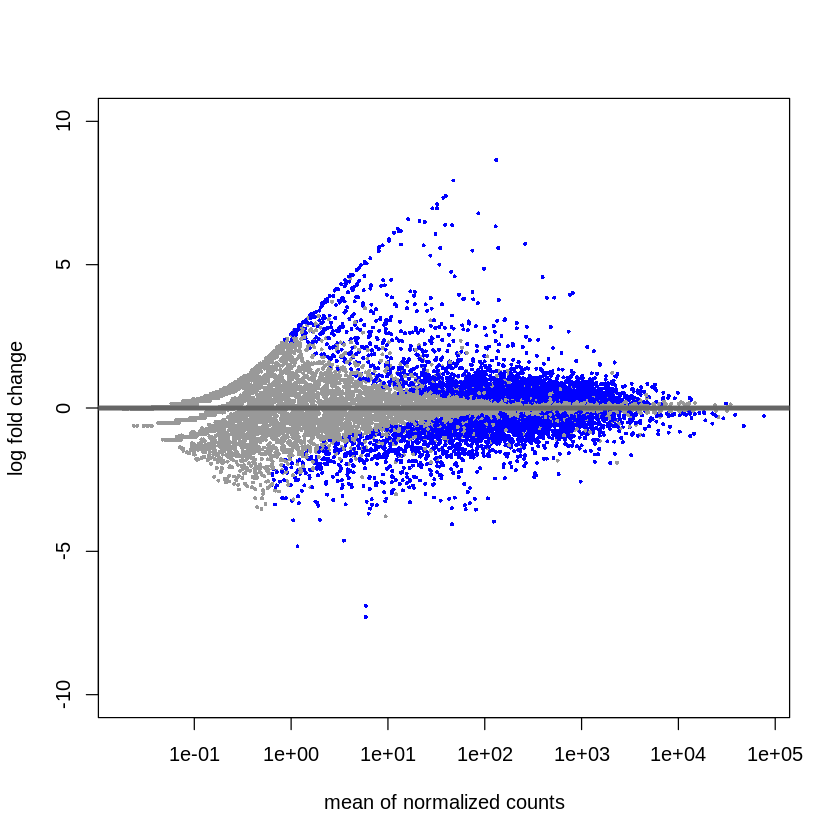

In [103]:
plotMA(dds_results$Th17p_Vehicle, ylim = c(-10, 10) )

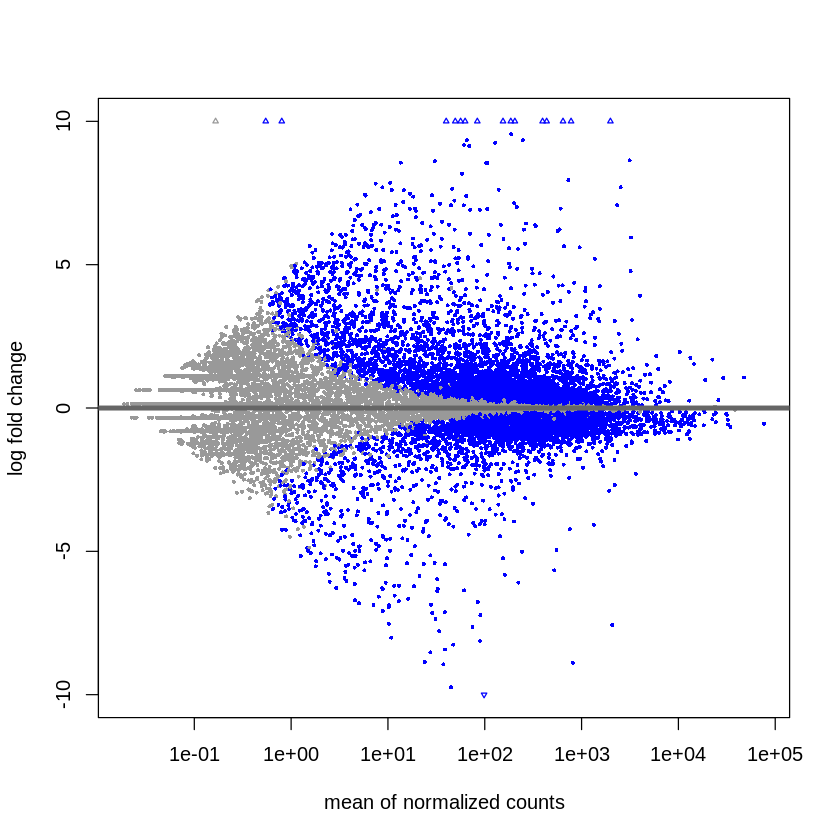

In [102]:
plotMA(res_all, ylim = c(-10, 10) )

In [98]:
dds_all <- DESeqDataSetFromMatrix(countData=compass_data, 
                              colData=meta_data, 
                              design=~rep + sample)

converting counts to integer mode

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”


In [99]:
dds_all <- DESeq(dds_all)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



In [100]:
res_all <- results(dds_all)
res_all

log2 fold change (MLE): sample Th17p Vehicle vs iTreg DFMO 
Wald test p-value: sample Th17p Vehicle vs iTreg DFMO 
DataFrame with 20817 rows and 6 columns
               baseMean log2FoldChange     lfcSE      stat      pvalue
              <numeric>      <numeric> <numeric> <numeric>   <numeric>
0610007P14RIK 877.90366       0.575453 0.0594915  9.672861 3.93228e-22
0610009B22RIK 108.51100      -0.276666 0.1130797 -2.446646 1.44192e-02
0610009L18RIK   3.27191      -0.123192 0.7142485 -0.172477 8.63062e-01
0610009O20RIK 203.81685      -0.111106 0.0978583 -1.135371 2.56220e-01
0610010F05RIK  28.81435       0.650939 0.2440219  2.667545 7.64078e-03
...                 ...            ...       ...       ...         ...
ZYG11A            0.000             NA        NA        NA          NA
ZYG11B          270.947      0.4814023 0.0902064  5.336678 9.46647e-08
ZYX             370.487      0.4724812 0.1024606  4.611343 4.00076e-06
ZZEF1           234.860     -0.0445362 0.0978150 -0.455311 6.488

In [114]:
for (r1 in unique(meta_data['sample'])$sample){
    for (r2 in unique(meta_data['sample'])$sample){
        if (r1 != r2){
            r <- results(dds_all, contrast=c("sample",r1,r2))
            fname <- paste(data_dir, 'deseq_genes_', r1, '_', r2, '.csv', sep = '')
            write.csv(r, file=fname)
        }
    }
}